<a href="https://colab.research.google.com/github/benigmatic/Machine-learning-and-Data-vizualization/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# NLP- natural language processing


### 1. EDA 

In [ ]:
import pandas as pd
import nltk   
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [ ]:
nltk.download('wordnet') # we will use wordnet lemmatizer
nltk.download('averaged_perceptron_tagger') #to be used for tagger
nltk.download('punkt') 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Load the data set into pandas data frame and show the first 5 rows

In [ ]:
data=  pd.read_csv('news.csv', sep = '\t', names = ["title", "text","subject", "date", "target"])
data = data.drop (data.index [0])
data.head(5)


,title,text,subject,date,target
1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
2,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
3,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
4,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
5,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


Two word clouds, one for fake news and one for true news to differentiate the most used words in real and fake news

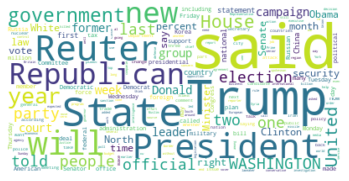

In [ ]:
# True news
true = data.loc[data['target'] == "1"]
text = " ".join(cat for cat in true.text)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

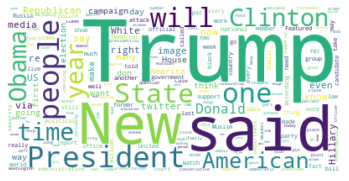

In [ ]:
# fake news
true = data.loc[data['target'] == "0"]
text = " ".join(cat for cat in true.text)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

VIII. Create a column "AllText" that has the concatenated subject, title, and text [For example, for each news we have the subject, title, and text. We want a column that has all of this together as a large string] 

In [ ]:
#Combine the columns subject, title, and text into single column AllText for the language processing

In [ ]:
cols = ['subject', 'title', 'text']
data["AllText"] = data[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

Save a copy of the data frame just in case

In [ ]:
copydf = data.copy()


Drop the title, text, subject, and date columns from the data frame

In [ ]:
data = data.drop(['title','text','subject','date'], axis =1)


Calculate the length of each text (I mean AllText column) and put them in a length column

In [ ]:
data['length'] = data['AllText'].apply(len)

Plot two histograms to see the distribution of the lengths.

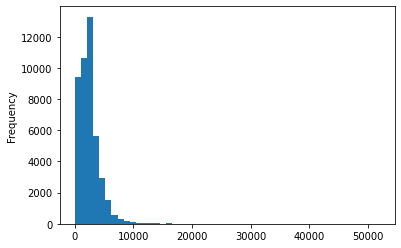

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
data['length'].plot(bins=50, kind='hist') 

### 2. Train Test Split


In [ ]:
from sklearn.model_selection import train_test_split
y = data["target"]
Y=y
X = data.drop(columns= ["target"], axis = 1)
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=101)

print(y_train)
print(X_train)


23211    0
6459     1
3181     1
9390     1
28042    0
        ..
12364    1
5696     1
8007     1
17746    1
17932    1
Name: target, Length: 35918, dtype: object
                                                 AllText  length
23211  News_ Anti-Defamation League LITERALLY Schools...    2918
6459   politicsNews_Kremlin says U.S. hacking allegat...    2530
3181   politicsNews_Illinois governor orders special ...    2915
9390   politicsNews_Puerto Rico rescue bill advances ...    2600
28042  News_ Trump Disproves The Effectiveness Of Wal...    1941
...                                                  ...     ...
12364  worldnews_Saudi King Salman says determined to...    2807
5696   politicsNews_Senate sets fight over Education ...    2611
8007   politicsNews_U.S. announces $364 million more ...    2585
17746  worldnews_Suicide bombers attack Damascus poli...    2279
17932  worldnews_Trump says 'only one thing will work...    2804

[35918 rows x 2 columns]


Using a count plot show how many real and fake news do we have in the training set and how many in the test set

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


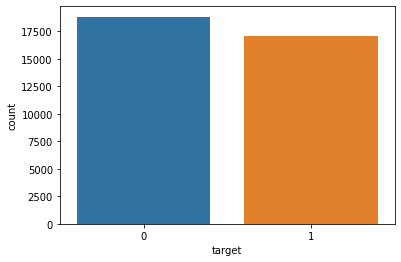

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


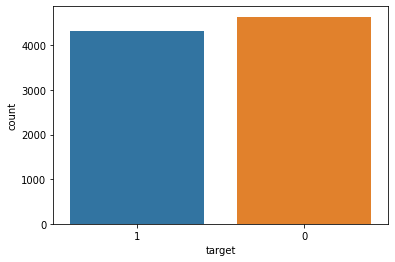

In [ ]:
import seaborn as sb
# Training set
sb.countplot(y_train)
plt.show()
# Testing set
sb.countplot(y_test)
plt.show()

### 3. Training and Testing Fake news classifier using MultinomialNB
A pipeline that will use countVectorizer with the function for data preprocessing, then use Tftransformer and then use the NaiveBayes classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer 
from nltk.stem.lancaster import LancasterStemmer
import nltk
import string
nltk.download('stopwords')
stemmer = LancasterStemmer()
stopwordList = stopwords.words('english')
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Tokenize
    3. convert them to lower case
    4. Remove all stopwords
    3. Perform stemming
    4. Returns a list of the cleaned text
    """

   

    # Check characters to see if they are in punctuation
    mess = [char for char in mess if char not in string.punctuation]
     # Join the characters again to form the string.
    mess = ''.join(mess)

    words = nltk.word_tokenize(mess)
    words = [t for t in words if t not in stopwordList]
    words = [stemmer.stem(w.lower()) for w in words]

    return words
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Fit the pipeline and then perform prediction

In [ ]:
pipeline.fit(X_train["AllText"],y_train)
predictions = pipeline.predict(X_test["AllText"])


Generate classification report and confusion matrix 

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[4460,  185],
       [ 216, 4119]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      4645
           1       0.96      0.95      0.95      4335

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



### 4. Training and Testing a Deep Neural Network
Import related library for using MLPClassifier from sklearn neural netowrk. 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

Create a pipeline

In [ ]:

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,4), max_iter= 15,random_state=0, early_stopping=True, verbose=2)),  # train on TF-IDF vectors w/ MLPClassifier classifier with two hidden layers
])

Fit the pipeline and then perform prediction

In [ ]:
pipeline.fit(X_train["AllText"],y_train)

Iteration 1, loss = 0.30684739
Validation score: 0.989978
Iteration 2, loss = 0.02549981
Validation score: 0.993875
Iteration 3, loss = 0.00762573
Validation score: 0.994710
Iteration 4, loss = 0.00404139
Validation score: 0.994432
Iteration 5, loss = 0.00273472
Validation score: 0.994710
Iteration 6, loss = 0.00210710
Validation score: 0.994710
Iteration 7, loss = 0.00173543
Validation score: 0.994710
Iteration 8, loss = 0.00149797
Validation score: 0.994710
Iteration 9, loss = 0.00133240
Validation score: 0.994710
Iteration 10, loss = 0.00120885
Validation score: 0.994710
Iteration 11, loss = 0.00111045
Validation score: 0.994989
Iteration 12, loss = 0.00102956
Validation score: 0.994989
Iteration 13, loss = 0.00096006
Validation score: 0.994989
Iteration 14, loss = 0.00089917
Validation score: 0.994989
Iteration 15, loss = 0.00084494
Validation score: 0.994710


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7feb93edf7a0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 4),
                               max_iter=15, random_state=0, verbose=2))])

In [ ]:
predictions = pipeline.predict(X_test["AllText"])

Generate classification report and confusion matrix 

In [ ]:
confusion_matrix(y_test, predictions)

array([[4618,   27],
       [  13, 4322]])

In [ ]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4631
           1       1.00      0.99      1.00      4349

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



# Build a high-performance model for classifying the news into different subjects.
 It means your target column will be the subject column. During this process, you have to use a neural network, properly preprocess the data frame, remove irrelevant columns, train and test the model properly and then finally show the classification report and confusion matrix. 

In [ ]:
#Create X_train, X_test, y_train, y_test
data=  pd.read_csv('/content/drive/MyDrive/EDA/news.csv', sep = '\t', names = ["title", "text","subject", "date", "target"])
data = data.drop (data.index [0])
cols = ['title', 'text']
data["AllText"] = data[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
y = data["subject"]
Y=y
X = data.drop(columns= ["target","title","subject","text", "date"], axis = 1)
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=101)

print(y_train)
print(X_train)

23211            News
6459     politicsNews
3181     politicsNews
9390     politicsNews
28042            News
             ...     
12364       worldnews
5696     politicsNews
8007     politicsNews
17746       worldnews
17932       worldnews
Name: subject, Length: 35918, dtype: object
                                                 AllText
23211   Anti-Defamation League LITERALLY Schools Sean...
6459   Kremlin says U.S. hacking allegations are 'rem...
3181   Illinois governor orders special session to br...
9390   Puerto Rico rescue bill advances to full House...
28042   Trump Disproves The Effectiveness Of Walls As...
...                                                  ...
12364  Saudi King Salman says determined to confront ...
5696   Senate sets fight over Education Secretary for...
8007   U.S. announces $364 million more in aid for Sy...
17746  Suicide bombers attack Damascus police center:...
17932  Trump says 'only one thing will work' with Nor...

[35918 rows x 1 columns]


In [ ]:
#Write a functin that will process the strings.
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

#Lemmatizer
from nltk.stem import WordNetLemmatizer 
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Tokenize
    3. convert them to lower case
    4. Remove all stopwords
    3. Perform stemming
    4. Returns a list of the cleaned text
    """

    stopwordList = stopwords.words('english')

    # Check characters to see if they are in punctuation
    mess = [char for char in mess if char not in string.punctuation]
     # Join the characters again to form the string.
    mess = ''.join(mess)

    words = nltk.word_tokenize(mess)
    words = [t for t in words if t not in stopwordList]
    words = [lemmatizer.lemmatize(w.lower()) for w in words]

    return words

In [ ]:
print(X_train.shape)
print(y_train.shape)

(35918, 1)
(35918,)


In [ ]:
from sklearn.neural_network import MLPClassifier
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,4), max_iter= 5,random_state=0, early_stopping=True, verbose=2)),  # train on TF-IDF vectors w/ MLPClassifier classifier with two hidden layers
])
pipeline.fit(X_train["AllText"],y_train)


Iteration 1, loss = 1.70403449
Validation score: 0.532851
Iteration 2, loss = 0.92101912
Validation score: 0.773107
Iteration 3, loss = 0.46723522
Validation score: 0.800111
Iteration 4, loss = 0.33258645
Validation score: 0.769766
Iteration 5, loss = 0.27800294
Validation score: 0.759465


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7febb3626050>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 4),
                               max_iter=5, random_state=0, verbose=2))])

In [ ]:
import numpy as np

predicted = pipeline.predict(X_test["AllText"])


Confusion matrix and classification report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(predicted,y_test))

                 precision    recall  f1-score   support

Government News       0.01      0.11      0.01        18
    Middle-east       0.64      0.51      0.57       210
           News       0.96      0.92      0.94      1866
        US_News       0.00      0.00      0.00         0
      left-news       0.01      0.30      0.01        20
       politics       0.93      0.51      0.66      2434
   politicsNews       0.98      0.94      0.96      2438
      worldnews       0.96      0.96      0.96      1994

       accuracy                           0.81      8980
      macro avg       0.56      0.53      0.51      8980
   weighted avg       0.95      0.81      0.86      8980



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 283,    7,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 166,    2,    0,    0,    0,    0,    0,    0,    0,    0],
       [1802,    2,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 153,    1,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 897,    5,    0,    0,    0,    0,    0,    0,    0,    0],
       [1317,   10,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1, 2331,    0,    0,    0,    0,    0,    0,    0,    0],
       [  12, 1991,    0,    0,    0,    0,    0,    0,    0,    0]])

According to the classification report, the precision is very low for Governemnt news, Middle-east news and US_news. That can be caused by the amount of those data in the train smaple. Collecting more sampes with those subjects can further improve the model. Those are the major weaknesses of the model. But it is highly effective in predicting subjects like world news and News. The other reason why some subjects are performing poorly might be because of the overlap between the subjects. For example, politicsNews and politics are very similar. US_News and Middle east news might wrongfully predicted as World news. 